<a href="https://colab.research.google.com/github/arfieee/arfieee/blob/main/Final_Wolf_12Jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw

In [ ]:
alpha = 1.7 #mortality rate due to predators
beta = 0.4
delta = 0.5
gamma = 0.1
x0 = 4.0
y0 = 2.0

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

In [ ]:
Nt = 1000
tmax = 30.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T

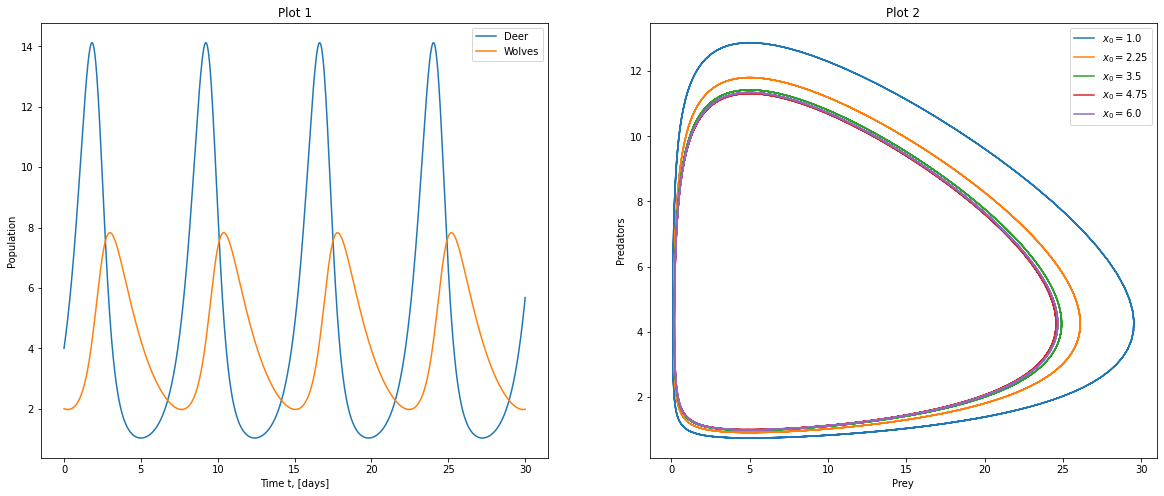

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
# plt.subplots(1, 2, figsize=(20, 4))
# plt.figure()
# plt.grid()
plt.title("Plot 1")
plt.plot(t, x, label = 'Deer')
plt.plot(t, y, label = "Wolves")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()


plt.subplot(1, 2, 2) # index 2
# plt.figure()
IC = np.linspace(1.0, 6.0, 5) # initial conditions for deer population (prey)
for deer in IC:
    X0 = [deer, 1.0]
    Xs = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
    plt.plot(Xs[:,0], Xs[:,1], "-", label = "$x_0 =$"+str(X0[0]))
plt.xlabel("Prey")
plt.ylabel("Predators")
plt.legend()
plt.title("Plot 2");

plt.show()

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# matplotlib.use('tkagg')

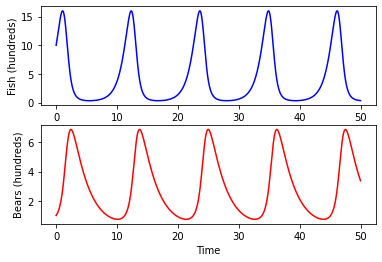

In [ ]:


y0 = [10,1] # [fish, bears] units in hundreds

t = np.linspace(0,50,num=1000)

alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.4

# steady state initial conditions
# y0 = [gamma/delta , alpha/beta] # [fish, bears] units in hundreds


params = [alpha, beta, delta, gamma]

def sim(variables, t, params):

    # fish population level
    x = variables[0]

    # bear population level
    y = variables[1]


    alpha = params[0]
    beta = params[1]
    delta = params[2]
    gamma = params[3]

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y

    return([dxdt, dydt])


y = odeint(sim, y0, t, args=(params,))


f,(ax1,ax2) = plt.subplots(2)

line1, = ax1.plot(t,y[:,0], color="b")



line2, = ax2.plot(t,y[:,1], color="r")

ax1.set_ylabel("Fish (hundreds)")
ax2.set_ylabel("Bears (hundreds)")
ax2.set_xlabel("Time")

plt.show()

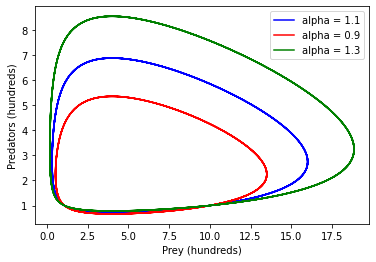

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


y0 = [10,1] # [fish, bears] units in hundreds

t = np.linspace(0,50,num=1000)

alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.4


params = [alpha, beta, delta, gamma]

def sim(variables, t, params):

    # fish population level
    x = variables[0]

    # bear population level
    y = variables[1]


    alpha = params[0]
    beta = params[1]
    delta = params[2]
    gamma = params[3]

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y

    return([dxdt, dydt])


# alpha = 1.1
y = odeint(sim, y0, t, args=(params,))



params = [0.9, beta, delta, gamma]
y2 = odeint(sim, y0, t, args=(params,))


params = [1.3, beta, delta, gamma]
y3 = odeint(sim, y0, t, args=(params,))






f,(ax1) = plt.subplots(1)



line1, = ax1.plot(y[:,0],y[:,1], color="b", label="alpha = 1.1")

line2, = ax1.plot(y2[:,0],y2[:,1], color="r", label="alpha = 0.9")

line3, = ax1.plot(y3[:,0],y3[:,1], color="g", label="alpha = 1.3")

leg = plt.legend()

ax1.set_xlabel("Prey (hundreds)")
ax1.set_ylabel("Predators (hundreds)")


plt.show()